# Matching for Causal Inference

## Imports

In [1]:
from causaldata import nsw_mixtape

from src.causal_inference.evaluation import balance
from src.causal_inference.matching import greedy_matching, optimal_matching
from src.causal_inference.visualization import matching

In [2]:
data = nsw_mixtape.load_pandas().data

In [3]:
data.sample(5)

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
277,Dehejia-Wahba Sample,0,24,7,1,0,0,1,0.0,0.000000,2193.528076
36,Dehejia-Wahba Sample,1,25,5,1,0,0,1,0.0,0.000000,6181.879883
132,Dehejia-Wahba Sample,1,26,11,1,0,1,1,0.0,1392.853027,1460.359985
313,Dehejia-Wahba Sample,0,33,9,0,1,1,1,0.0,0.000000,0.000000
239,Dehejia-Wahba Sample,0,23,11,1,0,0,1,0.0,0.000000,0.000000


In [4]:
treated = data[data["treat"] == 1]
control = data[data["treat"] == 0]
print(f"Treated: {len(treated)}")
print(f"Control: {len(control)}")

Treated: 185
Control: 260


In [5]:
covariates = ["age", "educ", "re74", "re75"]

matched_pairs_greedy = greedy_matching.greedy_match(treated, control, covariates=covariates)
matched_pairs_optimal = optimal_matching.optimal_match(treated, control, covariates=covariates)

In [6]:
len(matched_pairs_greedy), len(matched_pairs_optimal)

(185, 185)

In [7]:
balance_summary_greedy = balance.compute_balance_stats(data, matched_pairs_greedy, covariates=covariates)
balance_summary_optimal = balance.compute_balance_stats(data, matched_pairs_optimal, covariates=covariates)

In [8]:
balance_summary_greedy.abs().T

,Before Matching,After Matching
age,0.107372,0.055574
educ,0.143676,0.060324
re74,0.002135,0.006490
re75,0.084148,0.002686


In [9]:
balance_summary_optimal.abs().T

,Before Matching,After Matching
age,0.107372,0.073084
educ,0.143676,0.057308
re74,0.002135,0.041351
re75,0.084148,0.054622


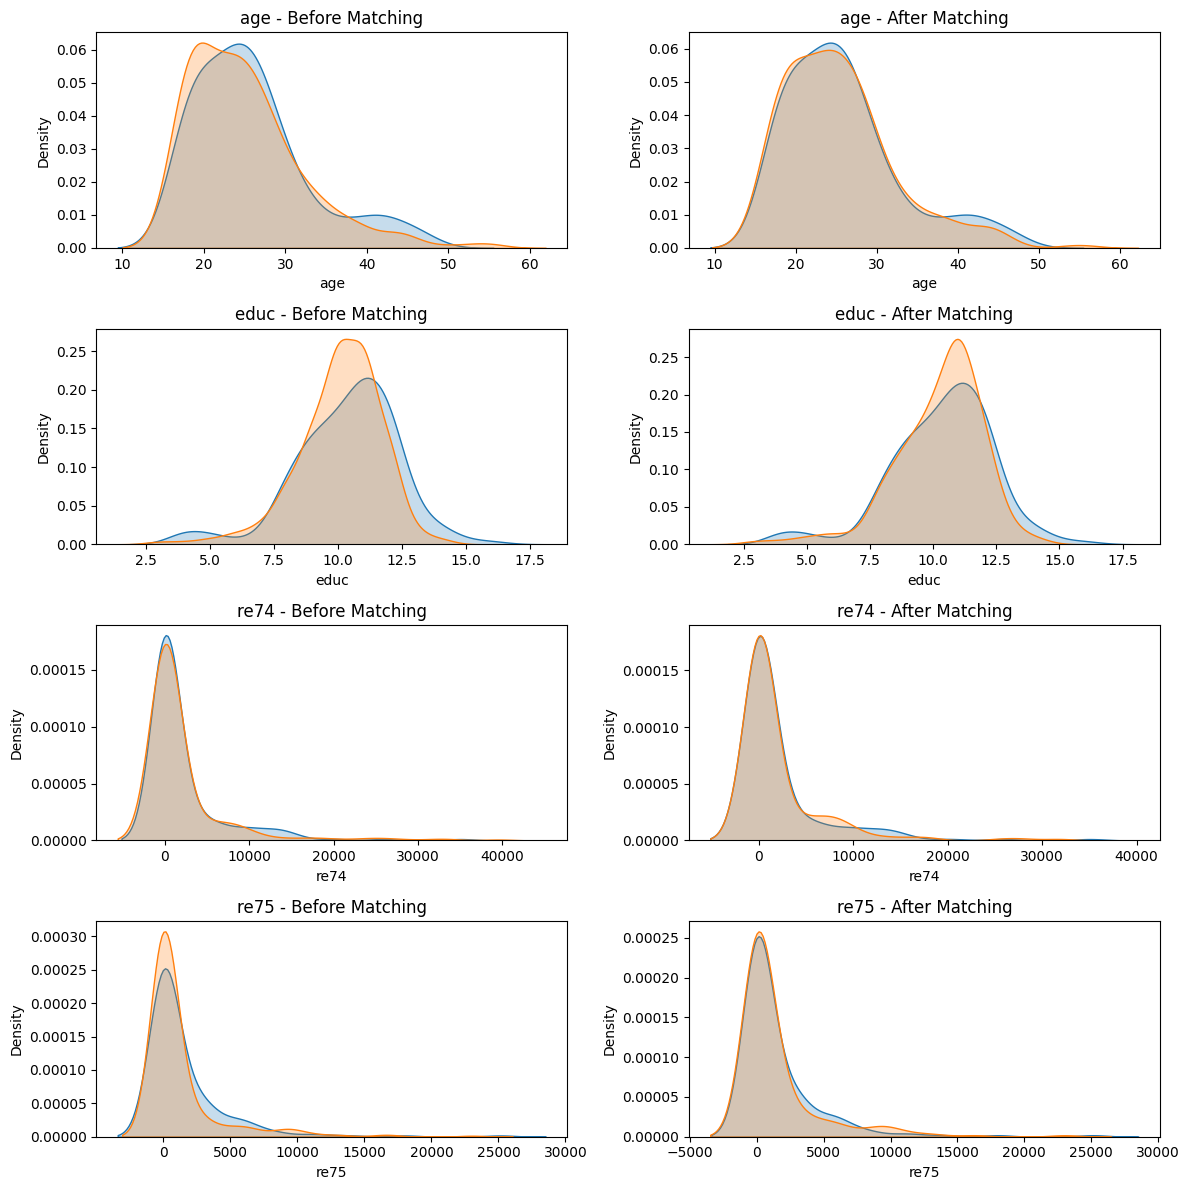

In [10]:
matching.plot_covariate_balance(data, matched_pairs_greedy, covariates=covariates)

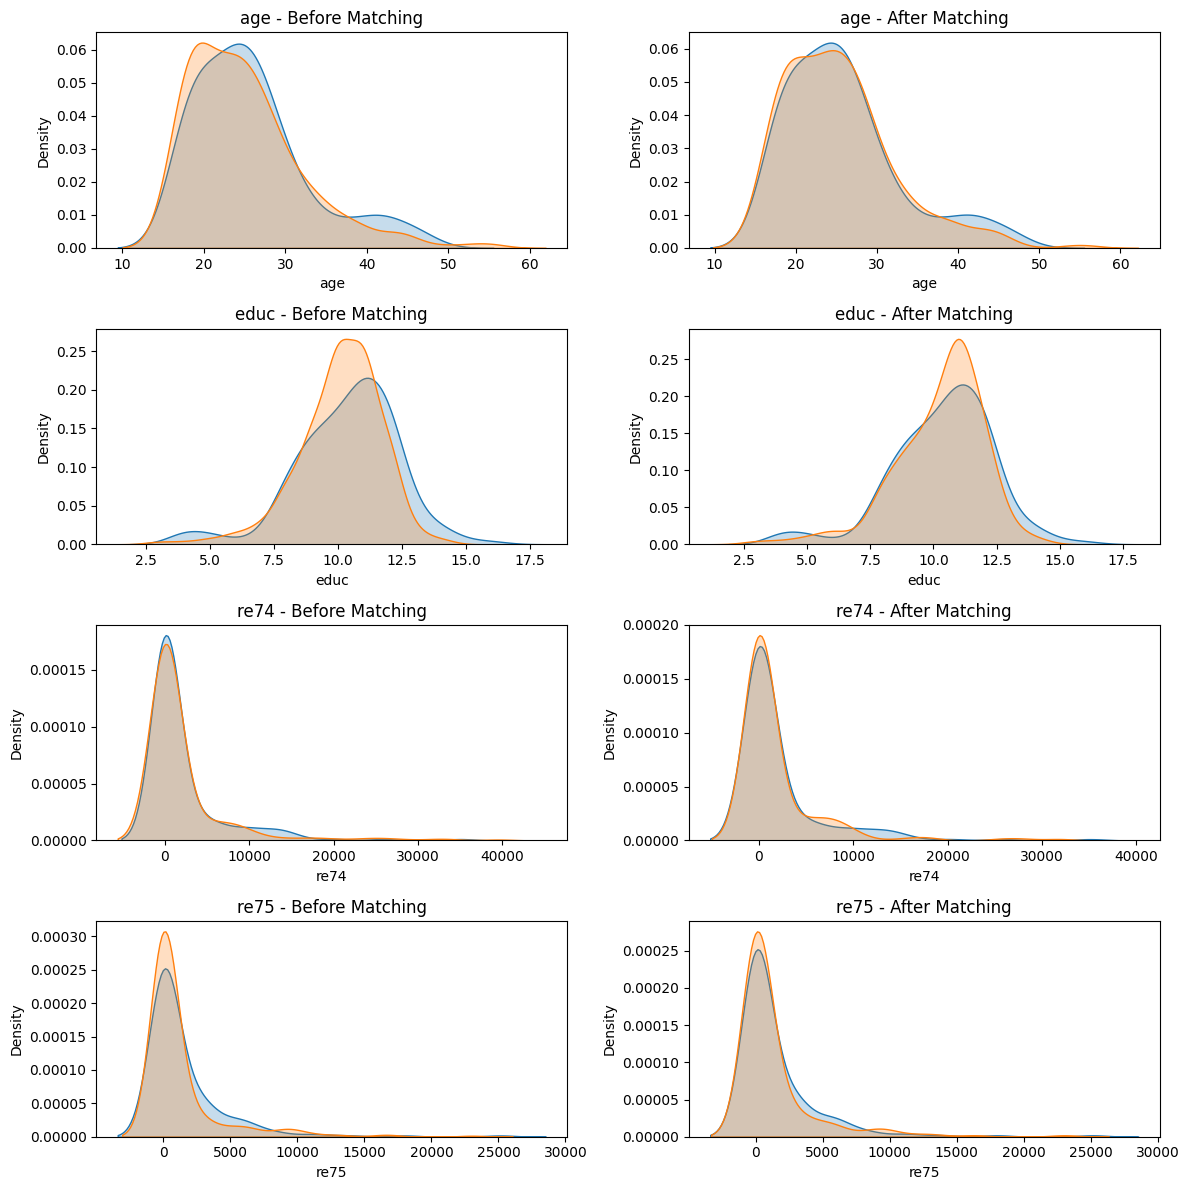

In [11]:
matching.plot_covariate_balance(data, matched_pairs_optimal, covariates=covariates)